# Cifar 100 Image Classification
 The dataset consists of 60000 colored images (50000 training and 10000 test) of 32 × 32 pixels in 100 classes grouped into 20 superclasses. Each image has a fine label (class) and a coarse label (superclass).

## Imports

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")

In [3]:
print(f'The shape of X_train is :{X_train.shape}','\t',f'The shape of Y_train is :{y_train.shape}','\n', f'The shape of X_test is :{X_test.shape}','\t',f'The shape of y_test is :{y_test.shape}')

The shape of X_train is :(50000, 32, 32, 3) 	 The shape of Y_train is :(50000, 1) 
 The shape of X_test is :(10000, 32, 32, 3) 	 The shape of y_test is :(10000, 1)


## Scaling

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## My Model
I have made my own model.

### Model Building

In [5]:
model = Sequential([
    Conv2D(64, input_shape=(32, 32, 3), kernel_size=(3, 3), activation='relu'),
    MaxPool2D(strides=(1, 1)),
    Conv2D(32, kernel_size=(2, 2), activation='relu'),
    MaxPool2D(strides=(1, 1)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 256)               5

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 15s 5ms/step - loss: 3.6672 - accuracy: 0.1465
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.9474 - accuracy: 0.2674
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6158 - accuracy: 0.3334
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3309 - accuracy: 0.3939
Epoch 5/25
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0752 - accuracy: 0.4480
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8312 - accuracy: 0.5005
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5938 - accuracy: 0.5564
Epoch 8/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3738 - accuracy: 0.6107
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1767 - accuracy: 0.6621
Epoch 10/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.99

### Model Evaluation

In [8]:
scores = model.evaluate(X_test, y_test)
print('loss:', scores[0])
print('accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 9.2668 - accuracy: 0.2692
loss: 9.26675033569336
accuracy: 0.26919999718666077


My model has **overfitted** the data.

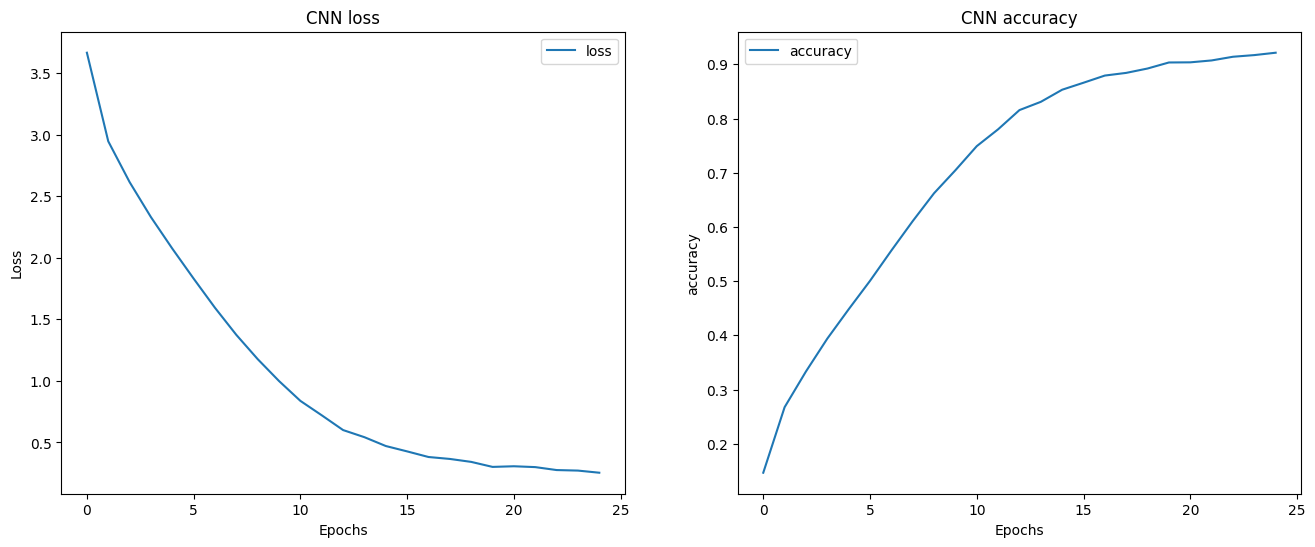

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax1.plot(history.history['loss'], label='loss')
ax1.set_title('CNN loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='accuracy')
ax2.set_title('CNN accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

## Transfer Learning
Used Trasfer Learning to improve model.

### Model Building - VGG Net

In [27]:
vgg_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)
vgg_base.trainable = False
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [32]:
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(100, activation='softmax')
])
vgg_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dense_14 (Dense)            (None, 100)               3300      
                                                                 
Total params: 14,787,780
Trainable params: 73,092
Non-trainable params: 14,714,688
_________________________________________________________________


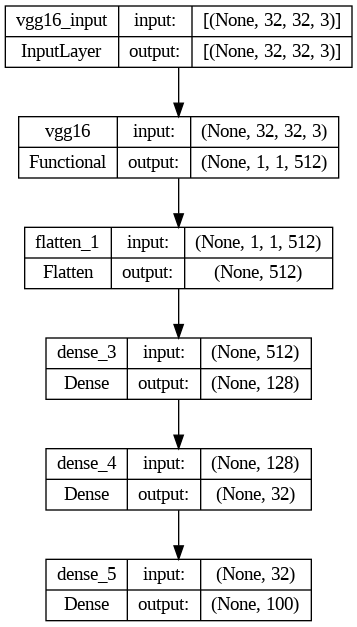

In [12]:
tf.keras.utils.plot_model(vgg_model, show_shapes=True)

In [29]:
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
vgg_history = vgg_model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
1563/1563 [==============================] - 16s 9ms/step - loss: 3.4942 - accuracy: 0.1718
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.9463 - accuracy: 0.2675
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.7935 - accuracy: 0.2985
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.6982 - accuracy: 0.3197
Epoch 5/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.6288 - accuracy: 0.3325
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.5671 - accuracy: 0.3453
Epoch 7/100
1563/1563 [==============================] - 15s 10ms/step - loss: 2.5188 - accuracy: 0.3565
Epoch 8/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.4769 - accuracy: 0.3636
Epoch 9/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.4401 - accuracy: 0.3714
Epoch 10/100
1563/1563 [==============================] - 14s 9

### Model Evaluation

In [31]:
scores = vgg_model.evaluate(X_test, y_test)
print('loss:', scores[0])
print('accuracy:', scores[1])

313/313 [==============================] - 3s 9ms/step - loss: 3.8127 - accuracy: 0.2943
loss: 3.81272029876709
accuracy: 0.29429998993873596


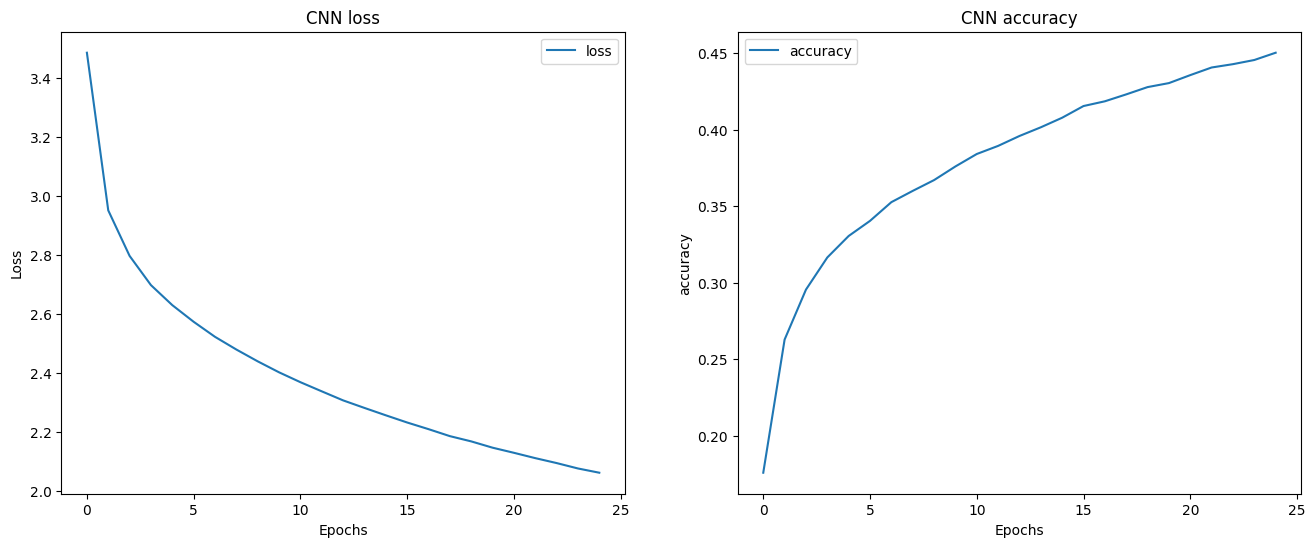

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax1.plot(vgg_history.history['loss'], label='loss')
ax1.set_title('CNN loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(vgg_history.history['accuracy'], label='accuracy')
ax2.set_title('CNN accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

### Model Building - ResNet (50 layers)

In [17]:
res_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)
res_base.trainable = False
res_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                          

In [18]:
res_model = Sequential([
    res_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(100, activation='softmax')
])
res_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 100)               3300      
                                                                 
Total params: 23,857,412
Trainable params: 269,700
Non-trainable params: 23,587,712
_________________________________________________________________


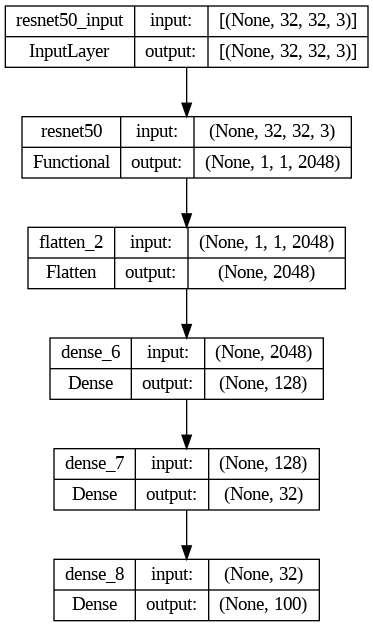

In [19]:
tf.keras.utils.plot_model(res_model, show_shapes=True)

In [20]:
res_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
res_history = res_model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 23s 11ms/step - loss: 4.6063 - accuracy: 0.0089
Epoch 2/25
1563/1563 [==============================] - 18s 11ms/step - loss: 4.6059 - accuracy: 0.0087
Epoch 3/25
1563/1563 [==============================] - 17s 11ms/step - loss: 4.6059 - accuracy: 0.0087
Epoch 4/25
1563/1563 [==============================] - 17s 11ms/step - loss: 4.6059 - accuracy: 0.0084
Epoch 5/25
1563/1563 [==============================] - 18s 11ms/step - loss: 4.6059 - accuracy: 0.0085
Epoch 6/25
1563/1563 [==============================] - 17s 11ms/step - loss: 4.6059 - accuracy: 0.0091
Epoch 7/25
1563/1563 [==============================] - 18s 11ms/step - loss: 4.6059 - accuracy: 0.0088
Epoch 8/25
1563/1563 [==============================] - 18s 11ms/step - loss: 4.6059 - accuracy: 0.0091
Epoch 9/25
1563/1563 [==============================] - 17s 11ms/step - loss: 4.6059 - accuracy: 0.0085
Epoch 10/25
1563/1563 [==============================] - 17s 11m

### Model Evaluation

In [22]:
scores = res_model.evaluate(X_test, y_test)
print('loss:', scores[0])
print('accuracy:', scores[1])

313/313 [==============================] - 4s 11ms/step - loss: 4.6052 - accuracy: 0.0100
loss: 4.605201244354248
accuracy: 0.009999999776482582


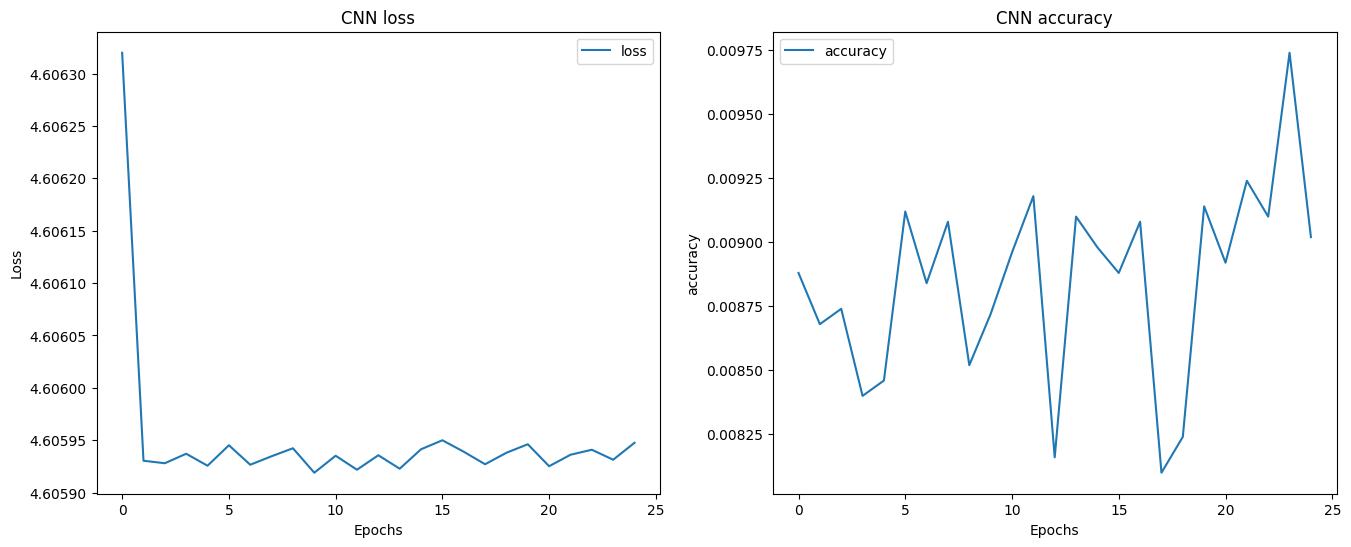

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax1.plot(res_history.history['loss'], label='loss')
ax1.set_title('CNN loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(res_history.history['accuracy'], label='accuracy')
ax2.set_title('CNN accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()